This material is from the follwoing webpages:

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

https://www.kaggle.com/benhamner/python-data-visualizations

<h2 align="center">Iris Prediction</h2>
<img align="center" src="https://raw.githubusercontent.com/tsungnan/images/master/iris_sanguinea.jpg" alt="Iris" , width=200, height=200 >

In [21]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
from matplotlib.colors import ListedColormap
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.14 (v2.7.14:84471935ed, Sep 16 2017, 12:01:12) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
scipy: 1.0.1
numpy: 1.14.2
matplotlib: 2.0.2
pandas: 0.22.0
sklearn: 0.19.1


In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, radviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<p>For each example (i.e., flower), there are <strong>five</strong> pieces of data.</p>
<p>Four are standard measurements of the flower's size (in centimeters), and the fifth is the species of iris.</p>
<p>There are three species: <strong>setosa</strong>, <strong>versicolor</strong>, and <strong>virginica</strong>.</p>
<p> Build a classifier that, given the two petal and two sepal measurements, can predict the species of an iris. Let's do a quick visualization before we start model building (always a good idea!):</p>

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names = names)

In [4]:
# shape
print(dataset.shape)

(150, 5)


<h2 align="center">Iris vercicolor</h2>
<img align="center" src="https://raw.githubusercontent.com/tsungnan/images/master/Iris_versicolor_3.jpg" alt="Iris" , width=200, height=200 >

<h2 align="center">Iris setosa</h2>
<img align="center" src="https://raw.githubusercontent.com/tsungnan/images/master/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris" , width=200, height=200 >

<h2 align="center">Iris virginica</h2>
<img align="center" src="https://raw.githubusercontent.com/tsungnan/images/master/1024px-Iris_virginica.jpg" alt="Iris" , width=200, height=200 >

In [5]:
dataset[40:45]

,sepal-length,sepal-width,petal-length,petal-width,class
40,5.0,3.5,1.3,0.3,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa


In [6]:
print(dataset.tail())

     sepal-length  sepal-width  petal-length  petal-width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [7]:
# head
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


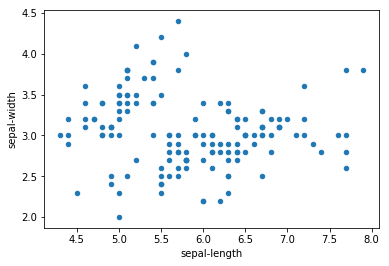

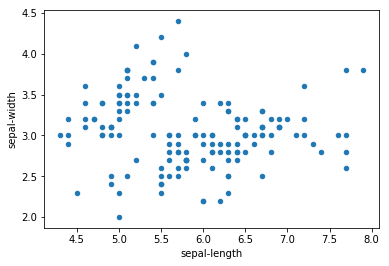

In [10]:
dataset.plot(kind = 'scatter', x = 'sepal-length', y = 'sepal-width')
plt.show()

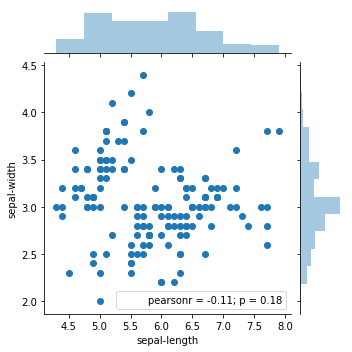

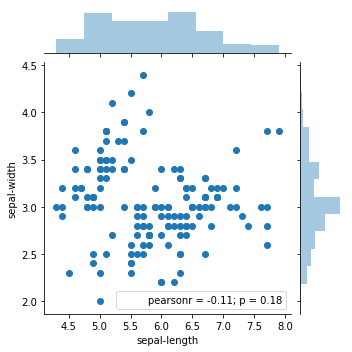

In [12]:
# pearsonr (Pearsonr correlation coefficient, PCC, or the bivariate correlation)
sns.jointplot(x = 'sepal-length', y = 'sepal-width', data = dataset, size = 5)
plt.show()

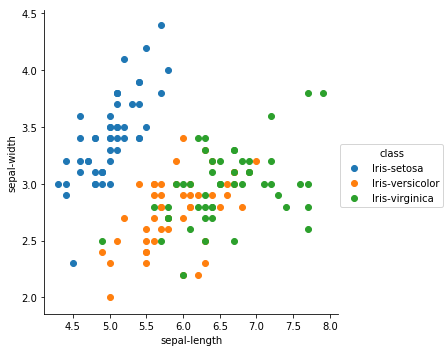

In [13]:
sns.FacetGrid(dataset, hue = 'class', size = 5).map(plt.scatter, 'sepal-length', 'sepal-width').add_legend()
plt.show()

In [8]:
sns.boxplot(x = 'class', y = 'petal-length', data = dataset)

In [9]:
sns.boxplot(x = 'class', y = 'petal-length', data = dataset)
sns.stripplot(x = 'class', y = 'petal-length', data = dataset, jitter = True, edgecolor = 'gray')

In [10]:
sns.violinplot(x = 'class', y = 'petal-length', data = dataset, size = 6)

In [11]:
sns.FacetGrid(dataset, hue = 'class', size = 6).map(sns.kdeplot, 'petal-length').add_legend()

In [12]:
sns.pairplot(dataset, hue = 'class', size = 3)

In [13]:
sns.pairplot(dataset, hue = 'class', size = 3, diag_kind = 'kde')

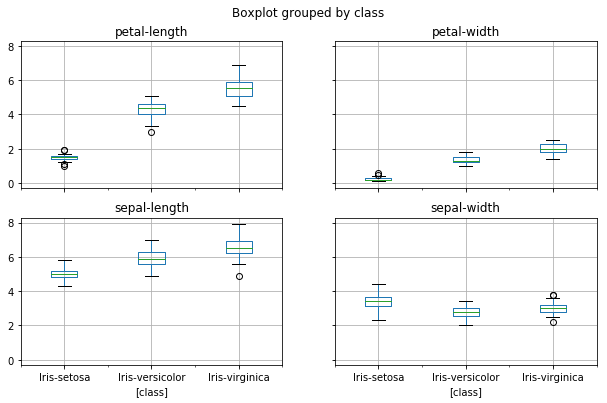

In [15]:
dataset.boxplot(by = 'class', figsize = (10, 6))
plt.show()

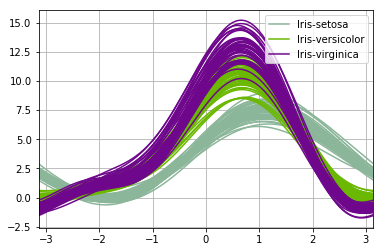

In [19]:
andrews_curves(dataset, 'class')
plt.show()

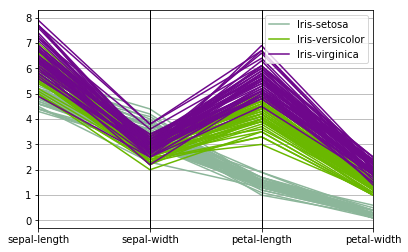

In [20]:
parallel_coordinates(dataset, 'class')
plt.show()

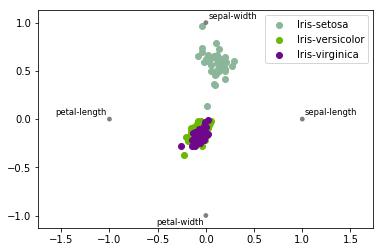

In [21]:
radviz(dataset, 'class')
plt.show()

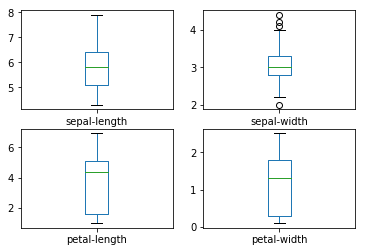

In [22]:
# box and whisker plots
dataset.plot(kind='box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

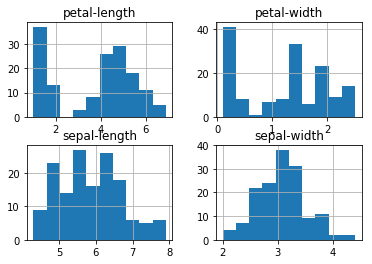

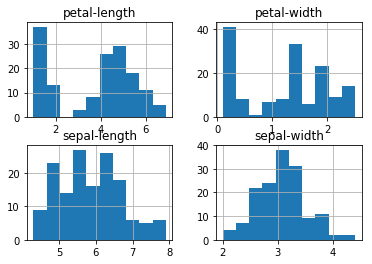

In [24]:
# histograms
dataset.hist()
plt.show()

In [20]:
# scatter plot matrix
scatter_matrix(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113c6f110>,
      dtype=object)

<h2>Munge and Split the Data for Training and Testing</h2>

In [27]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]


In [28]:
array.shape

(150, 5)

In [29]:
X.shape

(150, 4)

<p>As is standard in supervised machine learning, we'll train with some of the data, and measure the performance of our model with the remainder.</p>
<p>This is simple to do by hand, but is also built into scikit-learn as the&nbsp;<em><strong><code>train_test_split()</code></strong></em>&nbsp;function.</p>

In [30]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [31]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

<h2>Train a Scikit-learn Classifier</h2>

<p>We'll train a logistic regression classifier.</p>
<p>Doing this, with built-in hyperparameter cross-validation, is one line in scikit-learn.</p>
<p>A&nbsp;<strong><code>LogisticRegressionCV</code></strong>&nbsp;classifier has a&nbsp;<strong><code>.fit()</code>&nbsp;</strong>method that takes care of the gory numerical details of learning model parameters that best fit the training data.</p>
<p>So that method is all we need to do:</p>

In [32]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV()
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

<h2>Assess the Classifier Using Accuracy</h2>

<p>Now we can measure the fraction of the test set the trained classifier classifies correctly (i.e. accuracy).</p>

In [33]:
print("Accuracy = {:.2f}".format(lr.score(X_train, Y_train)))

Accuracy = 0.93


In [34]:
print("Accuracy = {:.2f}".format(lr.score(X_validation, Y_validation)))

Accuracy = 0.73


<p id="id-roIQuy"><strong>scikit-learn</strong> makes building a classifier very simple:</p>
<ul id="id-e5ujTp">
<li id="id-wkTzCzTQ">one line to instantiate the classifier</li>
<li id="id-YGTgsoTw">one line to train it</li>
<li id="id-qzTQu8T5">and one line to measure its performance</li>
</ul>

In [35]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


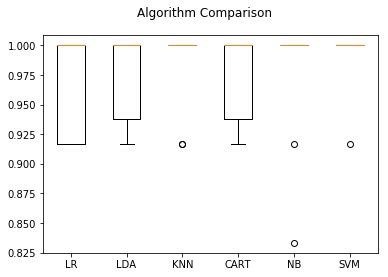

In [34]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [36]:
# https://www.kaggle.com/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset
def plot_decision_regions(x, y, classifier, test_id = None, resolution = 0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y == cl, 1],
                   alpha = 0.8, c = cmap(idx),
                   marker = markers[idx], label = cl)

In [37]:

# Make predictions on validation dataset


lr = LogisticRegressionCV()
lr.fit(X_train, Y_train)

predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7333333333333333
[[6 1 0]
 [0 7 5]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.86      0.92         7
Iris-versicolor       0.70      0.58      0.64        12
 Iris-virginica       0.64      0.82      0.72        11

    avg / total       0.75      0.73      0.73        30



<h2>Now do Something Very Similar With Keras</h2>

<p id="id-roIQuy">First a bit of data munging: scikit-learn's classifiers accept string labels, e.g.&nbsp;<code>"setosa"</code>. But&nbsp;<code>Keras</code>&nbsp;requires that labels be one-hot encoded.</p>
<p>This means we need to convert data that looks like:</p>
<p>setosa<br />versicolor<br />setosa<br />virginica<br />...</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


<p id="id-roIQuy">to a table that looks like:</p>
<p>&nbsp;</p>
<p>setosa versicolor virginica<br />&nbsp; &nbsp; &nbsp; &nbsp;1&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;0&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;0<br />&nbsp; &nbsp; &nbsp; &nbsp;0&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;1&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;0<br />&nbsp; &nbsp; &nbsp; 1&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 0&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;0<br />&nbsp; &nbsp; &nbsp; 0&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 0&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;1</p>
<p>&nbsp;</p>

In [38]:
from keras.utils import np_utils

def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(Y_train)
validation_y_ohe = one_hot_encode_object_array(Y_validation)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [39]:
train_y_ohe[0]

array([0., 0., 1.])

In [40]:
Y_train[0]

'Iris-virginica'

<h2>Build the Neural Network Model</h2>

<p id="id-roIQuy">We have four features and three classes, so the input layer must have<strong> four units</strong>, and the <strong>output layer must have three units. </strong></p>
<p>We only have to define the hidden layers. We're only going to have one hidden layer for this project, and we'll give it 16 units.</p>

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model2 = Sequential()

In [52]:
model2.add(Dense(units = 3, input_shape = (4,), kernel_initializer = 'normal', activation = 'softmax'))
model2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


<p id="id-roIQuy">Training neural networks often involves the concept of "<strong>mini-batching</strong>", which means showing the network a subset of the data, adjusting the weights, and then showing it another subset of the data.</p>
<p>When the network has seen all the data once, that's called an "<strong>epoch</strong>".</p>
<p>Tuning the mini-batch/epoch strategy is a somewhat problem-specific issue, but in this case we'll just use a mini-batch of 1.</p>
<p>That makes it effectively good old stochastic gradient descent, i.e. the data is shown to the network one flower at a time, and the weights adjusted immediately.</p>

In [43]:
history = model2.fit(X_train, train_y_ohe, epochs = 100, batch_size = 1, verbose = 1);

Epoch 1/100
120/120 [==============================] - 2s 20ms/step - loss: 0.8864 - acc: 0.6083
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6241 - acc: 0.7917
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5645 - acc: 0.7667
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4983 - acc: 0.7500
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4698 - acc: 0.7833
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4393 - acc: 0.7833
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4089 - acc: 0.8000
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4025 - acc: 0.8417
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3788 - acc: 0.8417
Epoch 10/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3589 - acc: 0.8750
Epoch 11/100
120/120 [================

In [44]:
loss, accuracy = model2.evaluate(X_validation, validation_y_ohe, verbose = 1)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 381us/step
Accuracy = 0.93


In [45]:
history = model2.fit(X_train, 
                     train_y_ohe,
                     epochs = 50, 
                     batch_size = 1, 
                     verbose = 1,
                    validation_data = (X_validation, validation_y_ohe))


 

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1105 - acc: 0.9917 - val_loss: 0.2275 - val_acc: 0.9000
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1047 - acc: 0.9917 - val_loss: 0.2186 - val_acc: 0.9000
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1039 - acc: 0.9833 - val_loss: 0.1980 - val_acc: 0.9333
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1022 - acc: 0.9667 - val_loss: 0.2177 - val_acc: 0.9000
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1025 - acc: 0.9917 - val_loss: 0.2005 - val_acc: 0.9333
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1067 - acc: 0.9750 - val_loss: 0.1985 - val_acc: 0.9000
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1029 - acc: 0.9833 - val_loss: 0.2118 - val_acc: 0.9333
Epoch 8/50
120/120 [===========

In [46]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

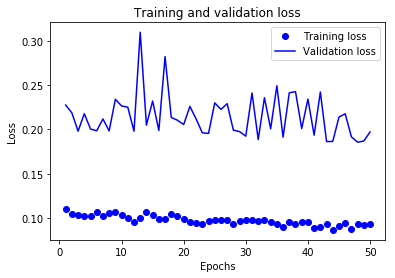

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
#acc = history.history['val_binary_accuracy'] 

val_acc = history.history['val_acc']
#val_acc = history.history['binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

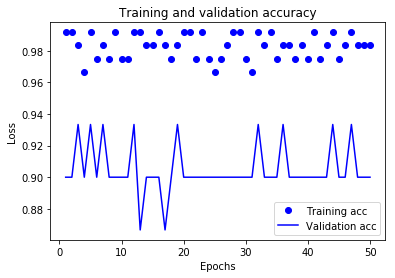

In [48]:
plt.clf()   # clear figure

acc_values = history_dict['acc']
 
#acc_values = history.history['val_binary_accuracy'] 

val_acc_values = history_dict['val_acc']
#val_acc_values = history.history['binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
acc_values[-1]

0.9833333333333333

In [50]:
val_acc[-1]

0.9